In [16]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando o dataset
df = pd.read_csv('Cities1.csv')

In [32]:
df

,City,Region,Country,AirQuality,WaterPollution
0,New York City,New York,United States of America,46.816038,49.504950
1,"Washington, D.C.",District of Columbia,United States of America,66.129032,49.107143
2,San Francisco,California,United States of America,60.514019,43.000000
3,Berlin,NaN,Germany,62.364130,28.612717
4,Los Angeles,California,United States of America,36.621622,61.299435
...,...,...,...,...,...
3958,Yanbu,Medina Province,Saudi Arabia,0.000000,50.000000
3959,Cordoba,Andalusia,Spain,85.714286,8.333333
3960,Vic,Catalonia,Spain,100.000000,0.000000
3961,Segovia,Castile and Leon,Spain,100.000000,0.000000


In [17]:
# Descrição do Projeto e das Variáveis
# Tipo de Variáveis e Número de Valores Nulos
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3963 entries, 0 to 3962
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   City            3963 non-null   object 
 1   Region          3538 non-null   object 
 2   Country         3963 non-null   object 
 3   AirQuality      3963 non-null   float64
 4   WaterPollution  3963 non-null   float64
dtypes: float64(2), object(3)
memory usage: 154.9+ KB
None
City                0
Region            425
Country             0
AirQuality          0
WaterPollution      0
dtype: int64


In [18]:
# Computando estatísticas descritivas para os atributos numéricos
descriptive_stats = df[['AirQuality', 'WaterPollution']].describe()
descriptive_stats
descriptive_stats.agg(['mean', 'median', 'std','max','min'])

,AirQuality,WaterPollution
mean,543.853652,533.252334
median,65.848948,47.317686
std,1381.918272,1386.136051
max,3963.000000,3963.000000
min,0.000000,0.000000


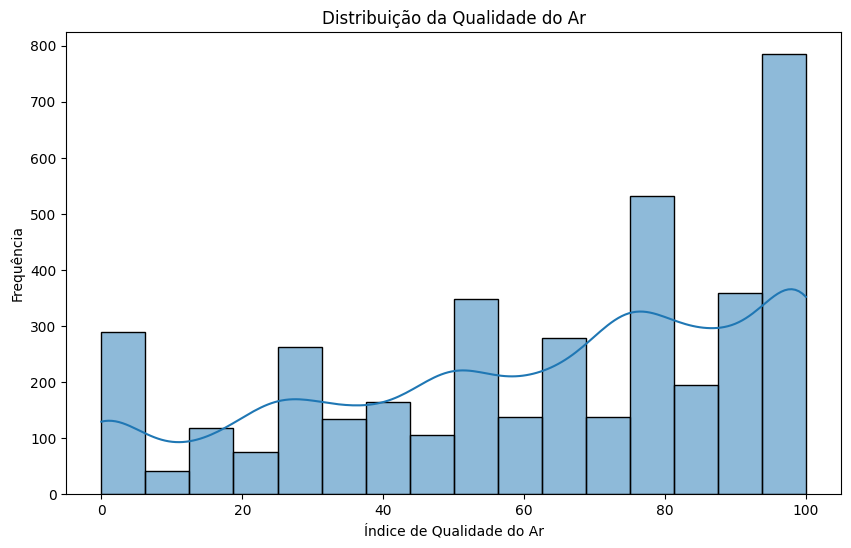

In [20]:
# Distribuição da Qualidade do Ar
plt.figure(figsize=(10, 6))
sns.histplot(df['AirQuality'], kde=True)
plt.title('Distribuição da Qualidade do Ar')
plt.xlabel('Índice de Qualidade do Ar')
plt.ylabel('Frequência')
plt.savefig('distribuicao_qualidade_ar.png')
plt.show()


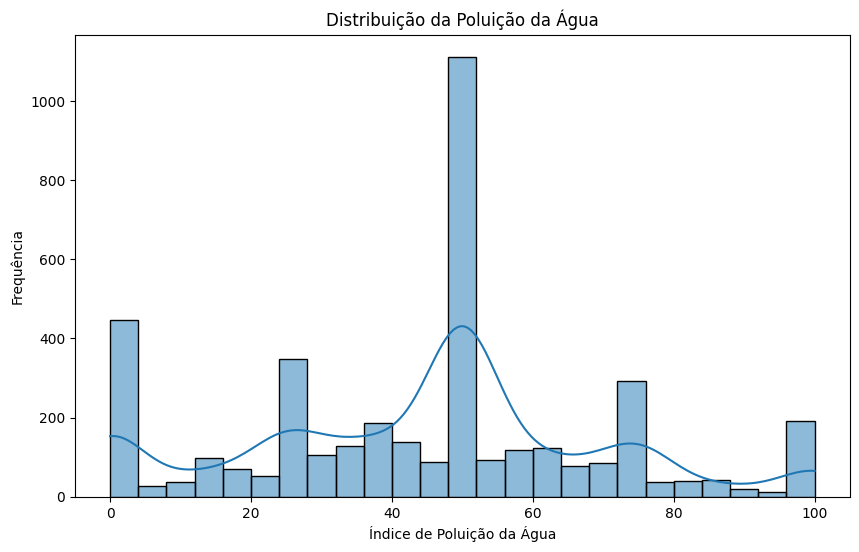

In [22]:
# Distribuição da Poluição da Água
plt.figure(figsize=(10, 6))
sns.histplot(df['WaterPollution'], kde=True)
plt.title('Distribuição da Poluição da Água')
plt.xlabel('Índice de Poluição da Água')
plt.ylabel('Frequência')
plt.savefig('distribuicao_poluicao_agua.png')
plt.show()


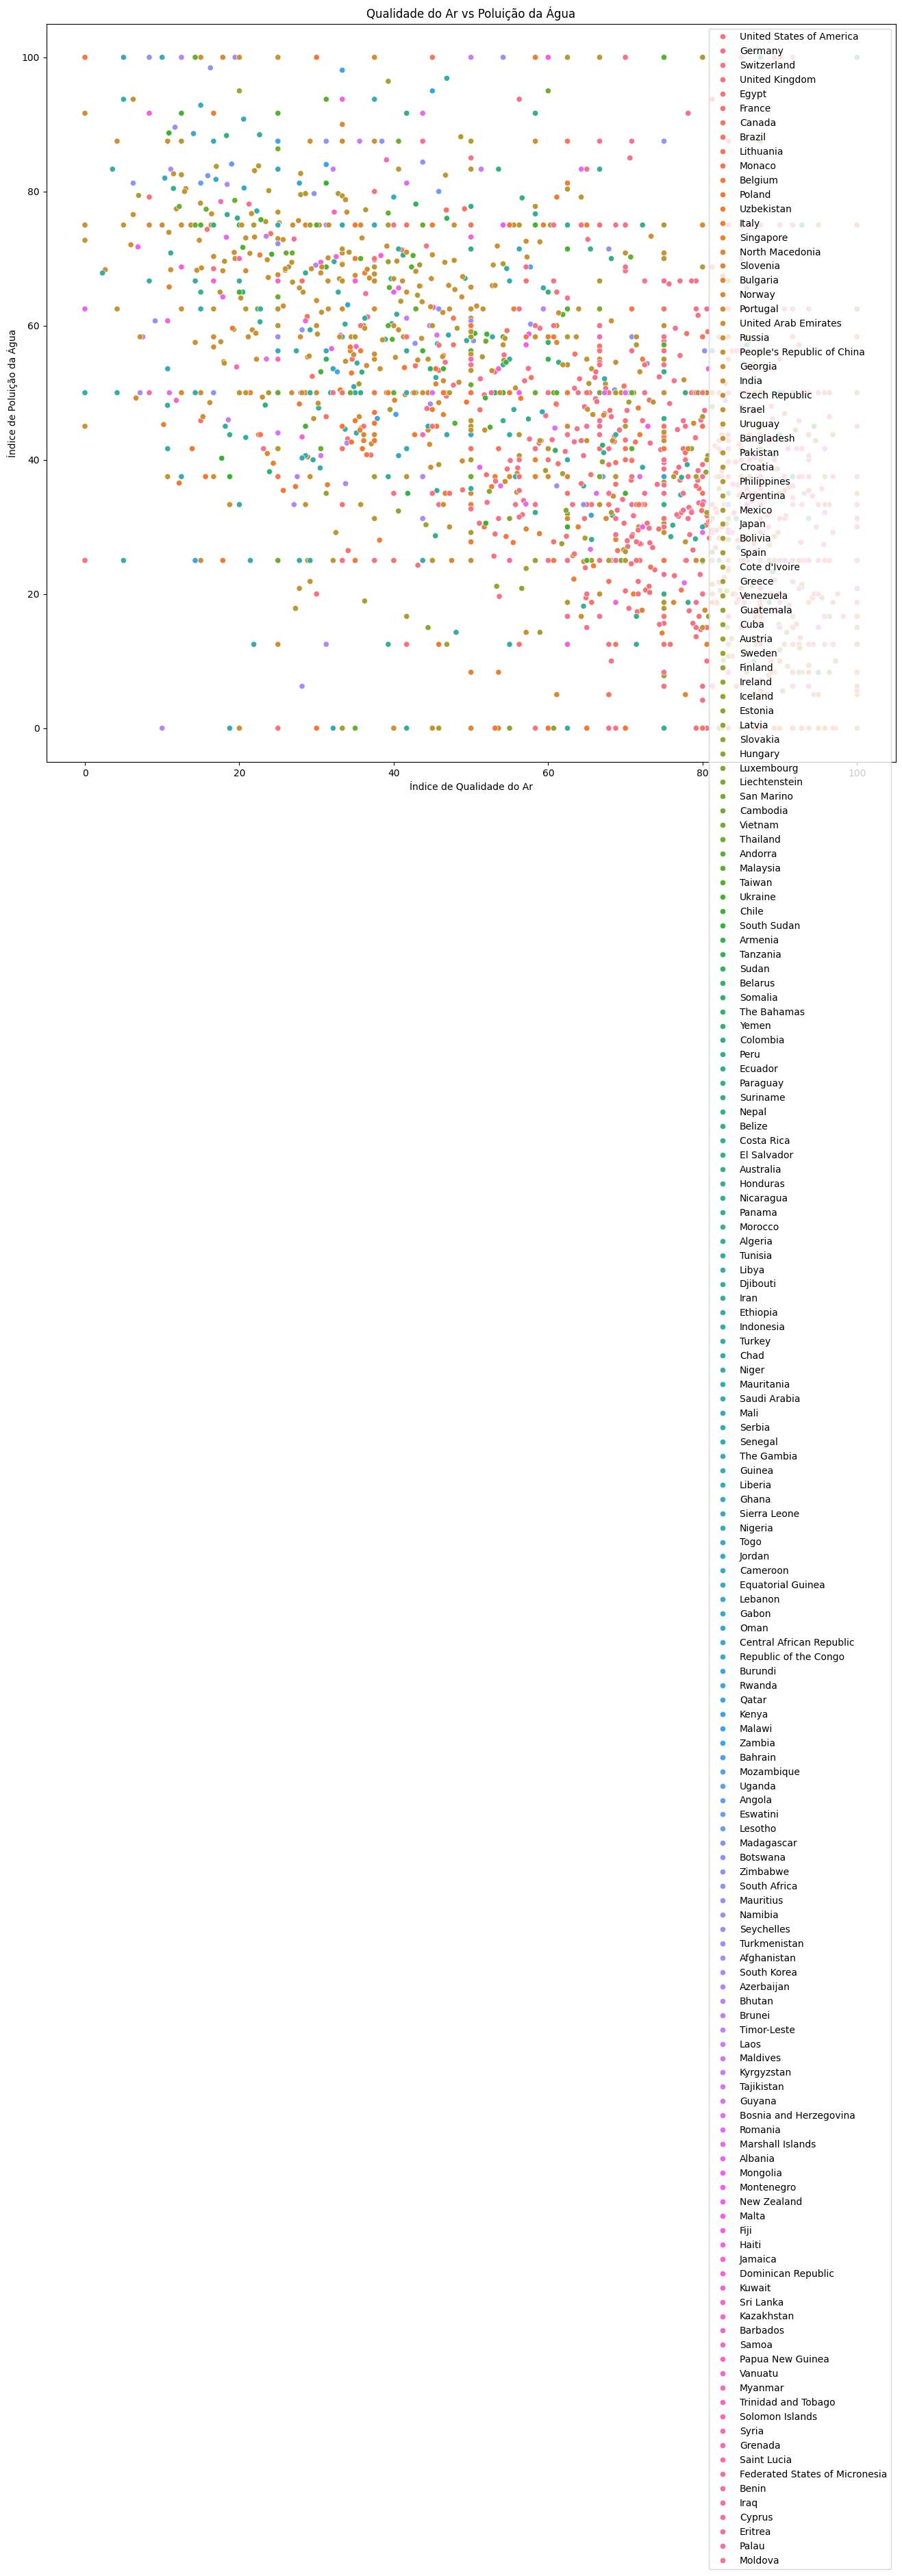

In [25]:
# Qualidade do Ar vs Poluição da Água
plt.figure(figsize=(16, 14))
sns.scatterplot(data=df, x='AirQuality', y='WaterPollution', hue='Country')
plt.title('Qualidade do Ar vs Poluição da Água')
plt.xlabel('Índice de Qualidade do Ar')
plt.ylabel('Índice de Poluição da Água')
plt.legend(loc='upper right')
plt.savefig('qualidade_ar_vs_poluicao_agua.png')
plt.show()


In [27]:
# Análise de correlação
correlation_matrix = df[['AirQuality', 'WaterPollution']].corr()
correlation_matrix


,AirQuality,WaterPollution
AirQuality,1.000000,-0.454173
WaterPollution,-0.454173,1.000000


In [28]:
# Comparando a qualidade do ar entre dois países usando teste t de Student
from scipy.stats import ttest_ind


In [30]:
# Substitua 'Country1' e 'Country2' pelos nomes dos países que deseja comparar
country1 = df[df['Country'] == 'United States of America']['AirQuality']
country2 = df[df['Country'] == 'India']['AirQuality']

t_stat, p_value = ttest_ind(country1, country2, nan_policy='omit')
f"T-statistic: {t_stat}, P-value: {p_value}"


'T-statistic: 19.4087015752135, P-value: 2.106131562523671e-71'